<a href="https://colab.research.google.com/github/RaulFloresR/Mineria_de_Datos/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equipo 6

Grupo 2 Miércoles de 7:00pm-10:00pm

1817336 Edmundo Isaí Ibarra Cavazos

1838148 Raúl Flores Robles

1869524 Luis Said Martinez Hernandez

1)

TITULO DE LA BASE DE DATOS: "Student alcohol consumption"

URL: https://www.kaggle.com/uciml/student-alcohol-consumption

2) DESCRIPCIÓN DE LOS DATOS

Estos datos son recolectados de una encuesta realizada a alumnos de preparatoria, donde se les preguntó acerca de la cantidad de alcohol que consumen, así como información personal y académica.

school: la escuela de los estudiantes. ('GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)

sex: el sexo de los estudiantes ('F' - female o 'M' - male)

age: la edad del estudiante.

address: El tipo de vivienda del estudiante ('U' - urbano o 'R' - rural)

famsize: Tamaño de la familia ('LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - Indica si los padres viven juntos o no ('T' - living together or 'A' - apart)

Medu - Nivel de estudios de la madre (0 - nada, 1 - Educacion primaria (4to año), 2 – 5to a 9no, 3 – Educacion secundaria or 4 – Educacion superior)

Fedu - Nivel de estudios del padre (0 - nada, 1 - Educacion primaria (4to año), 2 – 5to a 9no, 3 – Educacion secundaria or 4 – Educacion superior)

Mjob - Trabajo de la madre

Fjob - Trabajo del padre

reason - Razon para escoger su escuela

guardian - Tutor

traveltime - Tiempo de viaje a la escuela (1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a una hora, o 4 - >1 hora)

studytime - Tiempo semanal de estudio (1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)

failures - Numero de clases reprobadas

schoolsup - Apoyo educativo extra

famsup - Apoyo educativo de la familia

paid - clases extra pagadas para alguno de los temas de los cursos

activities - Actividades extra curriculares

nursery - Si atendió o no a una guarderia

higher - Si quiere o no educacion superior

internet - Acceso a internet en casa

romantic - Si se encuentra en una relacion romantica

famrel - calidad de las relaciones familiares (de 1 - muy mala a 5 - excelente)

freetime - Tiempo libre despues de la escuela (de 1 - muy poco a 5 - mucho)

goout - Salir con amigos (de 1 - muy poco a 5 - mucho)

Dalc - Consumo de alcohol entre semana (de 1 - muy poco a 5 - mucho)

Walc - Consumo de alcohol en fin de semana (de 1 - muy poco a 5 - mucho)

health - Estado actual de salud (de 1 - muy malo a 5 - muy bueno)

absences - Numero de faltas en la escuela

Las calificaciones son de 2 materias, matemáticas y portugués, y son G1, G2 y G3, con valores de 0 a 20 para las calificaciones de los 3 periodos.

3)JUSTIFICACIÓN DEL USO DE LA BASE DE DATOS

Esta base de datos es muy interesante por la cantidad diferente de variables con las que cuenta, lo que nos servirá para poder realizar un analisis y obtener conclusiones a partir de eso.

Estos datos ademas nos pueden ser utiles para entender los efectos que pueden tener el consumo del alcohol en edades tempranas.

4) OBJETIVOS PRINCIPALES Y SECUNDARIOS

Principal:

-Identificar la relación entre el consumo de alcohol con el rendimiento académico de los estudiantes

Secundarios:


-Analizar factores externos que puedan influir en el consumo de alcohol en los estudiantes

-Encontrar características en común de los alumnos que avanzaran a sus estudios superiores

In [1]:
import pandas as pd
import numpy as np
import json 
import csv
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [16]:
from google.colab import files
files.upload()

Saving mat-nbh.csv to mat-nbh.csv


{'mat-nbh.csv': b'sex,Pstatus,Medu,Fedu,traveltime,studytime,failures,activities,higher,romantic,famrel,freetime,goout,Dalc,Walc,health,Final\r\n0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0\r\n0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0\r\n0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0\r\n0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,1,1\r\n0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0\r\n1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,1\r\n1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0\r\n0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0\r\n1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1\r\n1,1,0,1,0,0,0,1,1,0,1,1,0,0,0,1,1\r\n0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0\r\n0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0\r\n1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1\r\n1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0\r\n1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,1\r\n0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,1\r\n0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0\r\n0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0\r\n1,1,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0\r\n1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0\r\n1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1\r\n1,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1\r\n1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,1\r\n1,1,

Visualización de datos:

In [4]:
df=pd.read_csv("student-mat.csv")
print(df) 
print(df.shape) 
print(df.head) 
print(df.tail)
print(df.columns)

    school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1       GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2       GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3       GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4       GP   F   16       U     GT3       T  ...     2       5        4   6  10  10
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
390     MS   M   20       U     LE3       A  ...     5       4       11   9   9   9
391     MS   M   17       U     LE3       T  ...     4       2        3  14  16  16
392     MS   M   21       R     GT3       T  ...     3       3        3  10   8   7
393     MS   M   18       R     LE3       T  ...     4       5        0  11  12  10
394     MS   M   19       U     LE3       T  ...     3       5        5   8 

In [5]:
students_filepath="student-mat.csv"
sd=pd.read_csv(students_filepath)

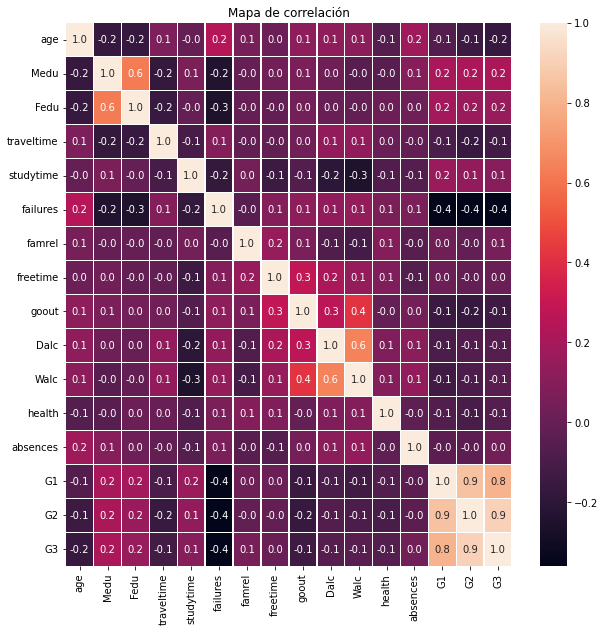

In [6]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Se eliminan las columnas que no se consideran relevantes

In [7]:
df=df.drop('school',axis=1)
df=df.drop('Medu',axis=1)
df=df.drop('Fedu',axis=1)
df=df.drop('address',axis=1)
df=df.drop('famsize',axis=1)
df=df.drop('Mjob',axis=1)
df=df.drop('Fjob',axis=1)
df=df.drop('reason',axis=1)
df=df.drop('guardian',axis=1)


In [8]:
df

sex  age Pstatus  traveltime  studytime  ...  health absences  G1  G2  G3
0     F   18       A           2          2  ...       3        6   5   6   6
1     F   17       T           1          2  ...       3        4   5   5   6
2     F   15       T           1          2  ...       3       10   7   8  10
3     F   15       T           1          3  ...       5        2  15  14  15
4     F   16       T           1          2  ...       5        4   6  10  10
..   ..  ...     ...         ...        ...  ...     ...      ...  ..  ..  ..
390   M   20       A           1          2  ...       4       11   9   9   9
391   M   17       T           2          1  ...       2        3  14  16  16
392   M   21       T           1          1  ...       3        3  10   8   7
393   M   18       T           3          1  ...       5        0  11  12  10
394   M   19       T           1          1  ...       5        5   8   9   9

[395 rows x 24 columns]

Gráficas:

Text(0, 0.5, 'Consumo de alcohol en fin de semana')

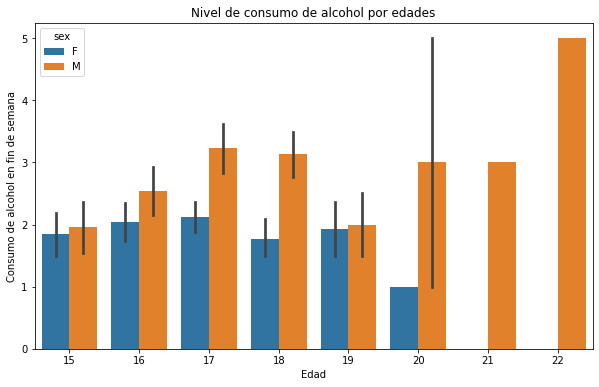

In [9]:
plt.figure(figsize=(10,6))
plt.title("Nivel de consumo de alcohol por edades")
sns.barplot(x=df['age'],y=df['Walc'],hue=df['sex'])
sns.set_style("white")
plt.xlabel("Edad")
plt.ylabel("Consumo de alcohol en fin de semana")

Consumo de alcohol en estudiantes el fin de semana. Los hombres de 21 y 22 son valores atipicos y únicos, asi como la mujer de 20 años. Esto se observa por las barras de error

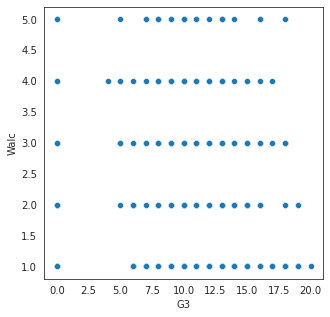

In [10]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['G3'], y=df['Walc'])

Ligera tendencia a calificaciones mas bajas en tercer parcial conforme sube el consumo de alcohol


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


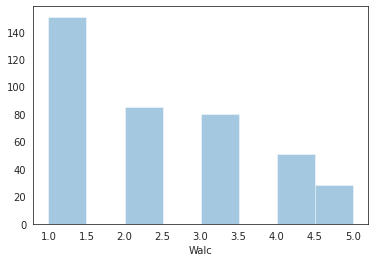

In [11]:
sns.distplot(a=df['Walc'], kde=False)

Técnica de minería: Reglas de asociación

Para la utilización de ésta técnica, se cambiaron los valores de la tabla original por respuestas binarias. Los datos de "si" fueron cambiados por 1 y "no" por 0; en la columa de sexo, 1 representan mujeres y 0 representan hombres. En cuanto a los valores de frecuencia del 1-5, el 0 representa del 1-3 y  el 1 representa 4-5, a excepción de la columna de salud, los cuales son representados por 0 los valores que eran 1-2 y los mayores son representados por 1.

In [12]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
df2=pd.read_csv("mat-nb.csv")
df2.head()

sex  Pstatus  Medu  Fedu  traveltime  ...  Walc  health  G1  G2  G3
0    1        0     1     1           0  ...     0       1   0   0   0
1    1        1     0     0           0  ...     0       1   0   0   0
2    1        1     0     0           0  ...     0       1   0   0   0
3    1        1     1     0           0  ...     0       1   1   1   1
4    1        1     0     0           0  ...     0       1   0   0   0

[5 rows x 24 columns]

Ahora se establece un valor minimo de .20, o sea que solo se mostrarán los items que aparezcan un 20% o más. Además, las tablas contarán con un filtro para poder facilitar la busqueda de información.


In [13]:
df2 = apriori(df2, min_support = 0.2, use_colnames = True)
df2

support                                           itemsets
0    0.526582                                              (sex)
1    0.896203                                          (Pstatus)
2    0.331646                                             (Medu)
3    0.243038                                             (Fedu)
4    0.232911                                        (studytime)
..        ...                                                ...
676  0.210127  (higher, paid, internet, famrel, famsup, nursery)
677  0.253165  (higher, internet, famrel, famsup, health, nur...
678  0.202532  (higher, paid, internet, famrel, health, nursery)
679  0.205063  (higher, internet, famrel, activities, health,...
680  0.240506  (higher, internet, famrel, famsup, health, nur...

[681 rows x 2 columns]

Lo siguiente es aplicar la técnica, con nivel de confianza de 60%, por lo que solo se mostrarán los resultados que coincidan con un 60% o más.

In [14]:
df_ar = association_rules(df2, metric = "confidence", min_threshold = 0.60)
df_ar

antecedents  ... conviction
0                                  (sex)  ...   0.938690
1                                  (sex)  ...   1.220713
2                                  (sex)  ...   1.015552
3                                  (sex)  ...   2.632911
4                                  (sex)  ...   0.914590
...                                  ...  ...        ...
4433  (famrel, nursery, Pstatus, famsup)  ...   1.268073
4434  (health, nursery, Pstatus, famsup)  ...   1.255214
4435            (famrel, health, famsup)  ...   1.253810
4436           (famrel, nursery, famsup)  ...   1.183755
4437           (health, nursery, famsup)  ...   1.187572

[4438 rows x 9 columns]

Adicionalmente, se pensó realizar lo mismo pero intercambiando los valores de hombres y mujeres, para observar si se encontraba alguna relación notable de esta manera.

In [17]:
dfh=pd.read_csv("mat-nbh.csv")
dfh.head()

sex  Pstatus  Medu  Fedu  traveltime  ...  goout  Dalc  Walc  health  Final
0    0        0     1     1           0  ...      1     0     0       1      0
1    0        1     0     0           0  ...      0     0     0       1      0
2    0        1     0     0           0  ...      0     0     0       1      0
3    0        1     1     0           0  ...      0     0     0       1      1
4    0        1     0     0           0  ...      0     0     0       1      0

[5 rows x 17 columns]

In [18]:
dfh = apriori(dfh, min_support = 0.2, use_colnames = True)
dfh

support                                       itemsets
0    0.473418                                          (sex)
1    0.896203                                      (Pstatus)
2    0.331646                                         (Medu)
3    0.243038                                         (Fedu)
4    0.232911                                    (studytime)
..        ...                                            ...
121  0.293671           (famrel, health, activities, higher)
122  0.243038             (famrel, health, freetime, higher)
123  0.253165         (higher, sex, famrel, health, Pstatus)
124  0.278481  (higher, famrel, activities, health, Pstatus)
125  0.220253    (freetime, higher, famrel, health, Pstatus)

[126 rows x 2 columns]

Para este ejemplo, usamos un nivel de confianza de 20% para tratar de encontrar relación con las columnas de consumo de alcohol, pero sin resultados de igual forma

In [19]:
dfh_ar = association_rules(dfh, metric = "confidence", min_threshold = 0.2)
dfh_ar

antecedents                          consequents  ...  leverage  conviction
0           (sex)                            (Pstatus)  ...  0.003570    1.078340
1       (Pstatus)                                (sex)  ...  0.003570    1.007622
2           (sex)                         (activities)  ...  0.024919    1.120037
3    (activities)                                (sex)  ...  0.024919    1.102532
4           (sex)                             (higher)  ... -0.016536    0.591772
..            ...                                  ...  ...       ...         ...
737    (freetime)    (famrel, health, Pstatus, higher)  ...  0.015606    1.090655
738      (higher)  (famrel, health, freetime, Pstatus)  ...  0.001538    1.002110
739      (famrel)  (health, Pstatus, freetime, higher)  ...  0.019619    1.036212
740      (health)  (famrel, Pstatus, freetime, higher)  ...  0.010518    1.019233
741     (Pstatus)   (famrel, health, freetime, higher)  ...  0.002442    1.003613

[742 rows x 9 columns]

# Conclusión: 
La técnica utilizada resultó ser útil de una manera un tanto inesperada pero obvia en retrospectiva. Al no tener resultados impresos, significa que un alto consumo de alcohol no se relaciona con ninguno de los otros valores a los que se le asignó un 1, por lo que se puede inferir que mientras más alcohol se consume, menor será la calidad de vida de manera tanto personal como académica.